In [97]:
import requests
from urllib.parse import urlparse, quote
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [146]:
corona = pd.read_csv("./data/전국코로나일별.csv",sep=',')

In [147]:
corona['date'] = pd.to_datetime(corona['date'])

In [148]:
corona = corona.set_index('date')

In [101]:
corona_month = corona.resample('M').sum()

In [102]:
corona_month.index = corona_month.index.strftime('%m월')

In [104]:
corona_monthT = corona_month.T
corona_monthT['지역합계'] = corona_monthT.sum(axis=1)

## 지역합계 top5 의 3월부터 11까지의 추이 

In [149]:
corona = corona[corona.columns.difference(['합계'])]
corona.loc['지역합계'] = corona.sum()


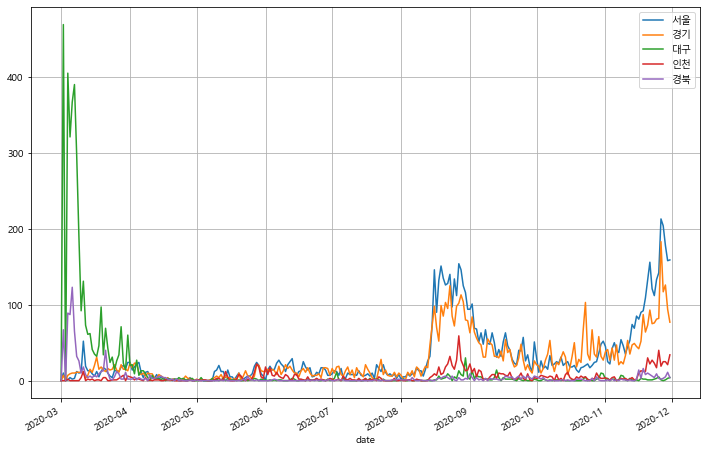

In [161]:
corona[:].T.sort_values('지역합계',ascending=False).iloc[:5].T.iloc[:-1].plot(figsize = (12,8),grid=True)
plt.show()

In [103]:
corona_month

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
date,,,,,,,,,,,,,,,,,,
03월,362,32,3552,57,22,9,22,45,389,24,34,60,682,36,7,4,6,5343
04월,183,18,168,29,4,10,4,0,200,17,1,15,65,21,5,6,4,750
05월,228,10,31,113,6,2,9,1,164,4,15,3,14,6,3,4,2,615
06월,452,7,23,135,71,12,3,3,367,8,5,22,10,11,6,5,4,1144
07월,288,17,34,42,49,160,4,0,339,9,9,23,12,25,12,14,7,1044
08월,2267,130,107,335,90,170,30,17,1714,115,55,142,54,77,48,104,19,5474
09월,1424,120,85,200,105,121,58,9,1123,35,43,152,96,55,41,27,14,3708
10월,719,171,42,129,82,16,16,6,1020,55,18,57,36,25,38,16,0,2446
11월,2802,217,58,365,52,185,35,18,1875,373,138,358,117,309,168,239,21,7330


In [105]:
corona_monthT_sort = corona_monthT.sort_values(by='지역합계',ascending=False).iloc[1:]
corona_monthT_sort.head().T

,서울,경기,대구,인천,경북
date,,,,,
03월,362,389,3552,57,682
04월,183,200,168,29,65
05월,228,164,31,113,14
06월,452,367,23,135,10
07월,288,339,34,42,12
08월,2267,1714,107,335,54
09월,1424,1123,85,200,96
10월,719,1020,42,129,36
11월,2802,1875,58,365,117
